In [1]:
from ipywidgets import interact, interactive, fixed, interact_manual
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as mtri
import ipywidgets as widgets

interactive(children=(IntSlider(value=2, description='x', max=30, min=2), Button(description='Run Interact', s…

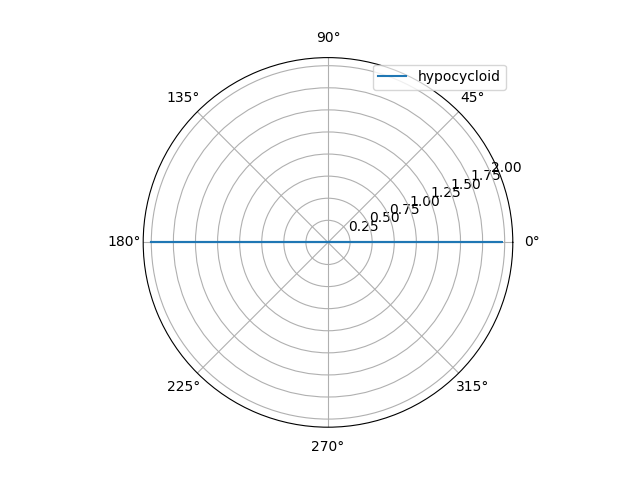

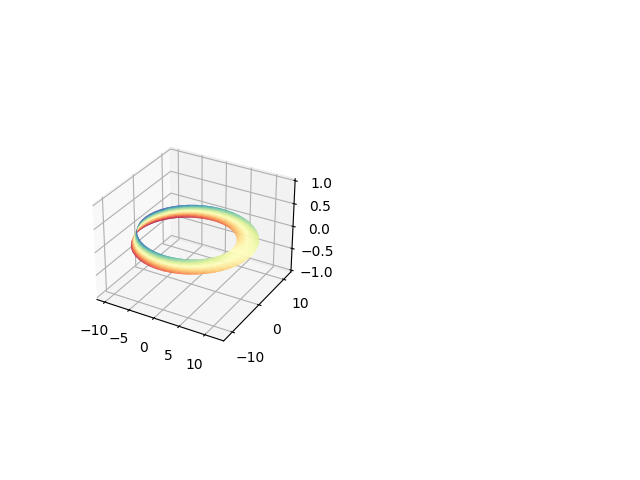

In [2]:
%matplotlib widget

# ==========
# First plot
# ==========

# Make a mesh in the space of parameterisation variables u and v
u = np.linspace(-1 * np.pi, np.pi, endpoint=True, num=50)
v = np.linspace(-1 * np.pi, np.pi, endpoint=True, num=50)

u, v = np.meshgrid(u, v)
u, v = u.flatten(), v.flatten()
def hypocycloid(x):
    fig = plt.figure(label='hypocycloid with x cusps')
    k = x
    t = np.linspace(-1 * np.pi, np.pi, endpoint=True, num=10*k)
    x1 = ((k-1)*np.cos(t)+np.cos(t*(k-1)))
    y1 = ((k-1)*np.sin(t)-np.sin(t*(k-1)))
    r = np.sqrt(x1**2+y1**2)
    theta = np.arctan2(y1,x1)
    ax = fig.add_subplot(projection='polar')
    #{\displaystyle x(\theta )=(R-r)\cos \theta +r\cos \left({\frac {R-r}{r}}\theta \right)}
    ax.plot(theta, r, label='hypocycloid')
    ax.legend()
    plt.show()

    k = x
    x1 = ((k-1)*np.cos(v)+np.cos(v*(k-1)))
    y1 = ((k-1)*np.sin(v)-np.sin(v*(k-1)))
    r = (x1**2+y1**2)**.5
    theta = np.arctan2(y1,x1)+u*1/k
    x = (5*k+r*np.cos(theta))*np.cos(u)
    y = (5*k+r*np.cos(theta))*np.sin(u)
    z = r*np.sin(theta)/(10*k)
    #( R1 - (x^2 + y^2)1/2 )^2 + z^2 = R2^2
    #
    #x=(c+acosv)cosu
    #y=(c+acosv)sinu
    #z=asinv

    # Triangulate parameter space to determine the triangles
    tri = mtri.Triangulation(u, v)
    fig1 = plt.figure(label='umbilic torus with x cusps')

    # Plot the surface.  The triangles in parameter space determine which x, y, z
    # points are connected by an edge.
    ax = fig1.add_subplot(1, 2, 1, projection='3d')
    ax.plot_trisurf(x, y, z, triangles=tri.triangles, cmap=plt.cm.Spectral)
    ax.set_zlim(-1, 1)
    plt.show()

interact_manual(hypocycloid,description='k', x=widgets.IntSlider(min=2, max=30, step=1, value=2))
hypocycloid(2)
